---
## Decision Trees<br> <font size=3.4>Problem Statement:<br> A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("Company_Data.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [5]:
#Changing the categorical variables into dummies.
df1 = pd.get_dummies(df)

#Converting the Target variable i.e. Sales into Categorical
df1['Category'] = pd.cut(df1['Sales'], 
                        bins=[0,10, np.inf], 
                        labels=['Low/Mid','High'],
                        include_lowest=True)

In [6]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Category
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,Low/Mid
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Low/Mid
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low/Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,High
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,Low/Mid
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,Low/Mid
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,Low/Mid


In [7]:
x1 = df1.iloc[:,1:15]
y1 = df1.iloc[:,15]

In [8]:
x1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [9]:
y1

0      Low/Mid
1         High
2         High
3      Low/Mid
4      Low/Mid
        ...   
395       High
396    Low/Mid
397    Low/Mid
398    Low/Mid
399    Low/Mid
Name: Category, Length: 400, dtype: category
Categories (2, object): ['Low/Mid' < 'High']

In [10]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x1,y1, test_size=0.25,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria<br><br>Iteration-1: Max Depth = 2

In [11]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model1.fit(x_train,y_train)
preds1 = model1.predict(x_test) # predicting on test data set 

print('Model leaves:',model1.get_n_leaves(),'\n','\n',
      pd.Series(preds1).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds1==y_test))

Model leaves: 4 
 
 Low/Mid    81
High       19
dtype: int64 
 
 Model Accuracy is: 0.82


### Iteration-2: Max Depth = 3

In [12]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)
preds2 = model2.predict(x_test) # predicting on test data set 

print('Model leaves:',model2.get_n_leaves(),'\n','\n',
      pd.Series(preds2).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds2==y_test))

Model leaves: 7 
 
 Low/Mid    81
High       19
dtype: int64 
 
 Model Accuracy is: 0.76


### Iteration-3: Max Depth = 4

In [13]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model3.fit(x_train,y_train)
preds3 = model3.predict(x_test) # predicting on test data set 

print('Model leaves:',model3.get_n_leaves(),'\n','\n',
      pd.Series(preds3).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds3==y_test))

Model leaves: 12 
 
 Low/Mid    81
High       19
dtype: int64 
 
 Model Accuracy is: 0.8


### Iteration-4: Max Depth = 5

In [14]:
model4 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model4.fit(x_train,y_train)
preds4 = model4.predict(x_test) # predicting on test data set 

print('Model leaves:',model4.get_n_leaves(),'\n','\n',
      pd.Series(preds4).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds4==y_test))

Model leaves: 18 
 
 Low/Mid    78
High       22
dtype: int64 
 
 Model Accuracy is: 0.81


### Iteration-5: Max Depth = 6

In [15]:
model5 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model5.fit(x_train,y_train)
preds5 = model5.predict(x_test) # predicting on test data set 

print('Model leaves:',model5.get_n_leaves(),'\n','\n',
      pd.Series(preds5).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds5==y_test))

Model leaves: 24 
 
 Low/Mid    83
High       17
dtype: int64 
 
 Model Accuracy is: 0.84


### Iteration-6: Max Depth = 7

In [16]:
model6 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model6.fit(x_train,y_train)
preds6 = model6.predict(x_test) # predicting on test data set 

print('Model leaves:',model6.get_n_leaves(),'\n','\n',
      pd.Series(preds6).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds6==y_test))

Model leaves: 28 
 
 Low/Mid    83
High       17
dtype: int64 
 
 Model Accuracy is: 0.82


### Hence, the classifier model at the end of iteration 5 has the max accuracy i.e. 83%

In [17]:
print(classification_report(preds5,y_test))

              precision    recall  f1-score   support

        High       0.53      0.59      0.56        17
     Low/Mid       0.91      0.89      0.90        83

    accuracy                           0.84       100
   macro avg       0.72      0.74      0.73       100
weighted avg       0.85      0.84      0.84       100



### Building Decision Tree Classifier (CART) using Gini Criteria

In [18]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [19]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [20]:
#Prediction and computing the accuracy
predG=model_gini.predict(x_test)
print('Model Accuracy is:',np.mean(predG==y_test))

Model Accuracy is: 0.83


### Same Accuracy is achieved using CART as well<br><br>Let's Visualize both the Decision Trees

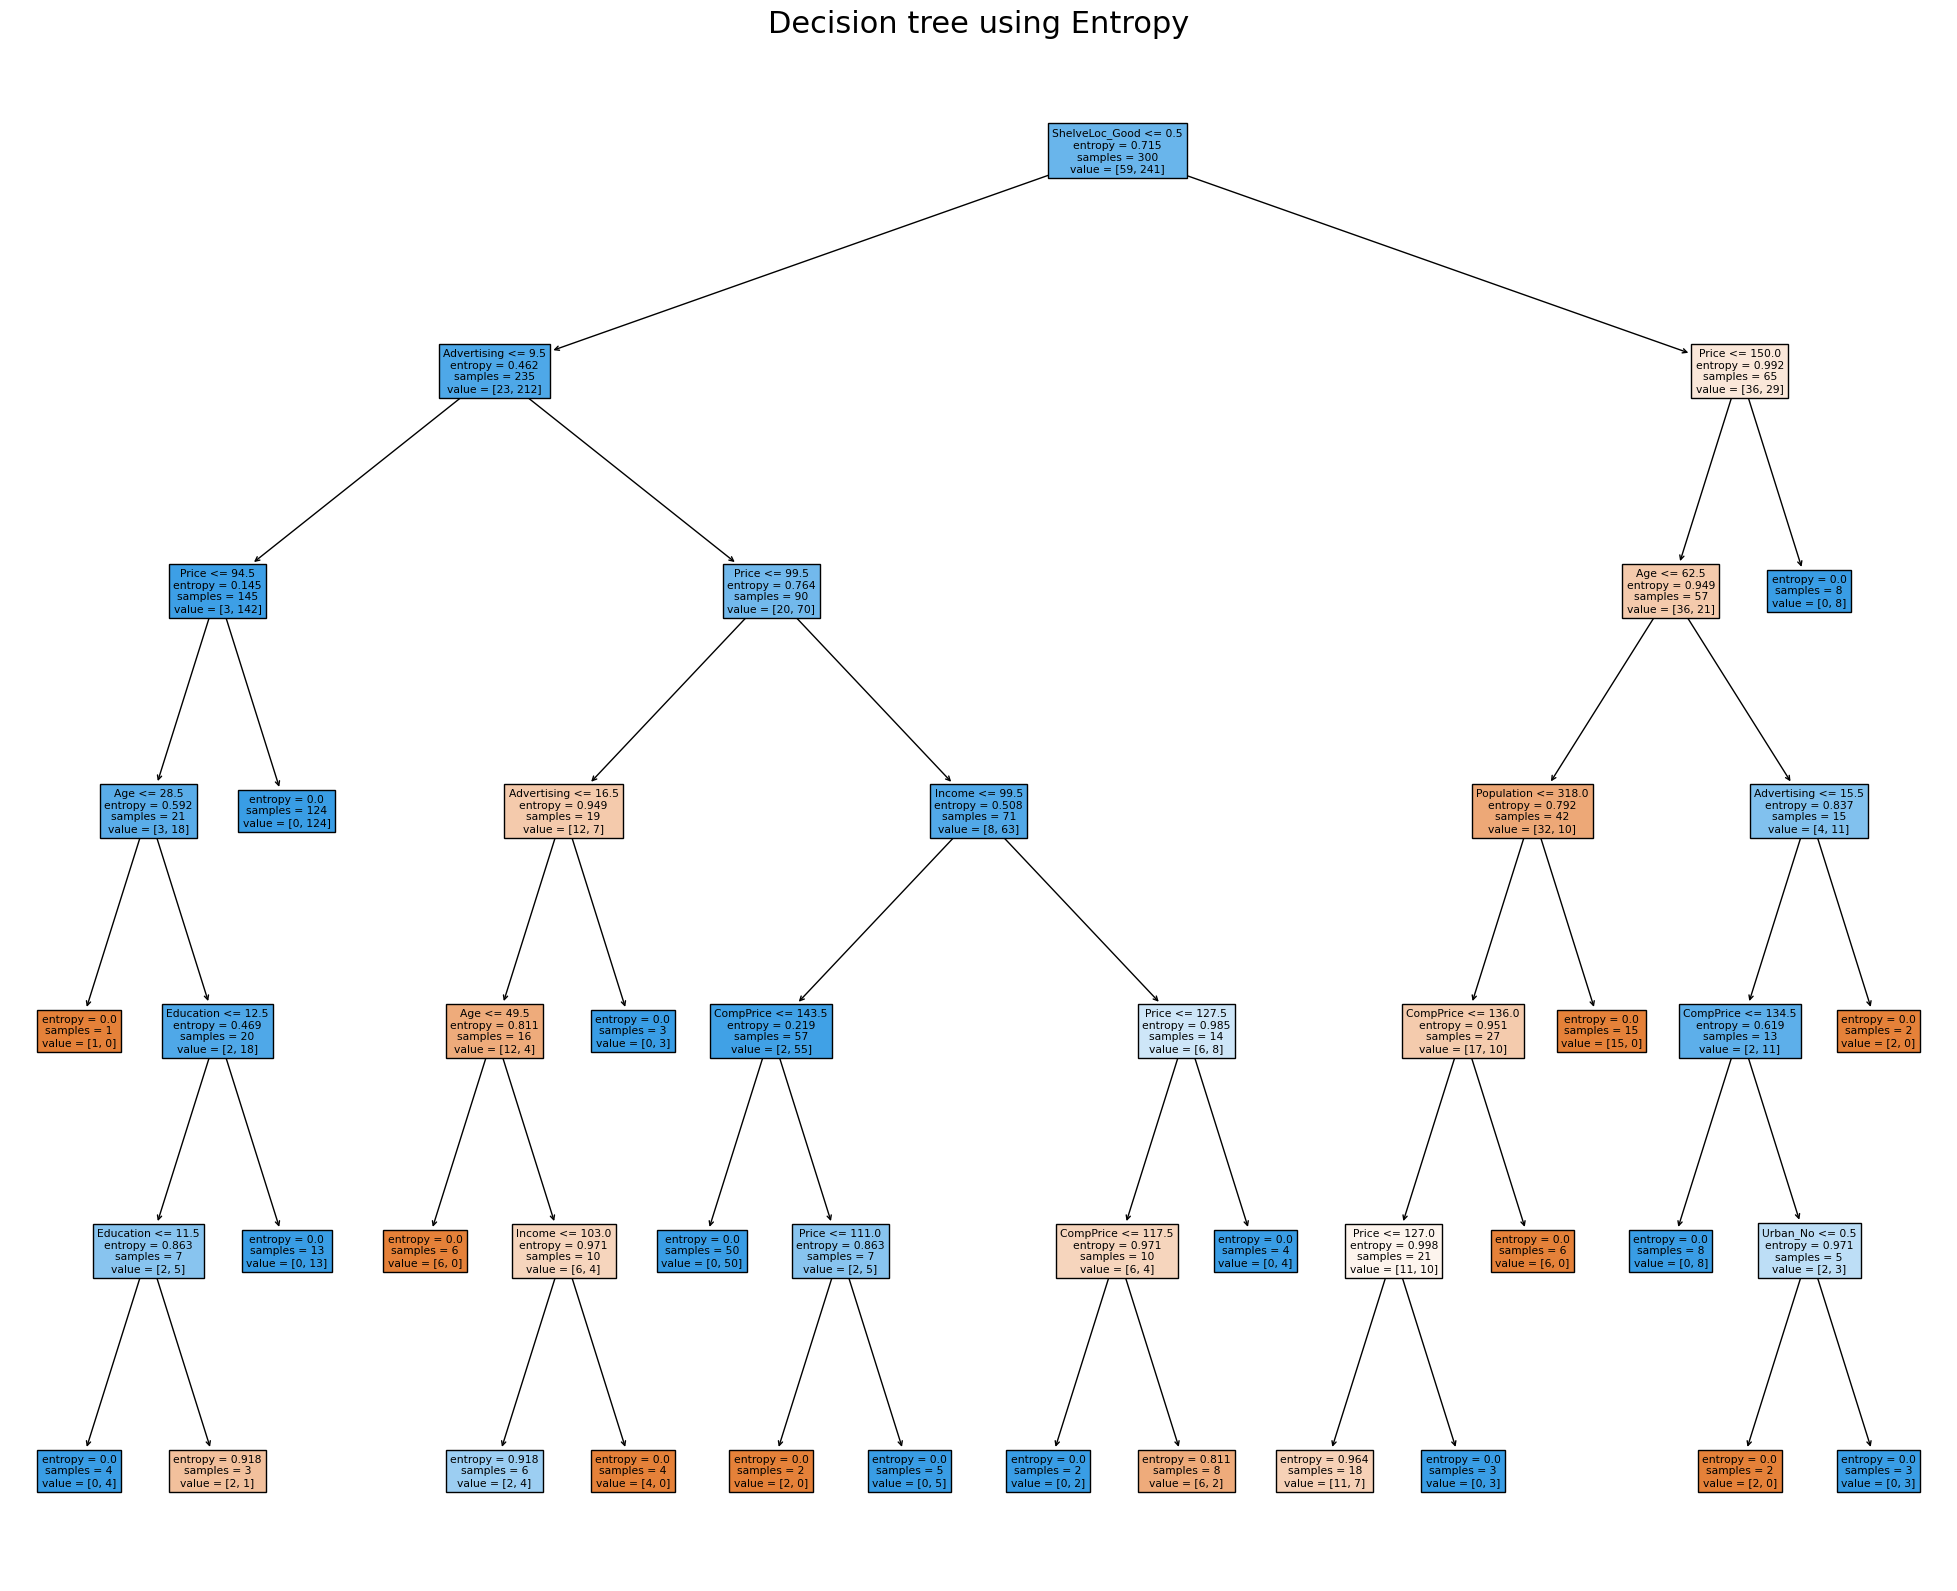

In [21]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model5,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price','Age','Education',
                     'ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No',
                     'US_Yes'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.png')

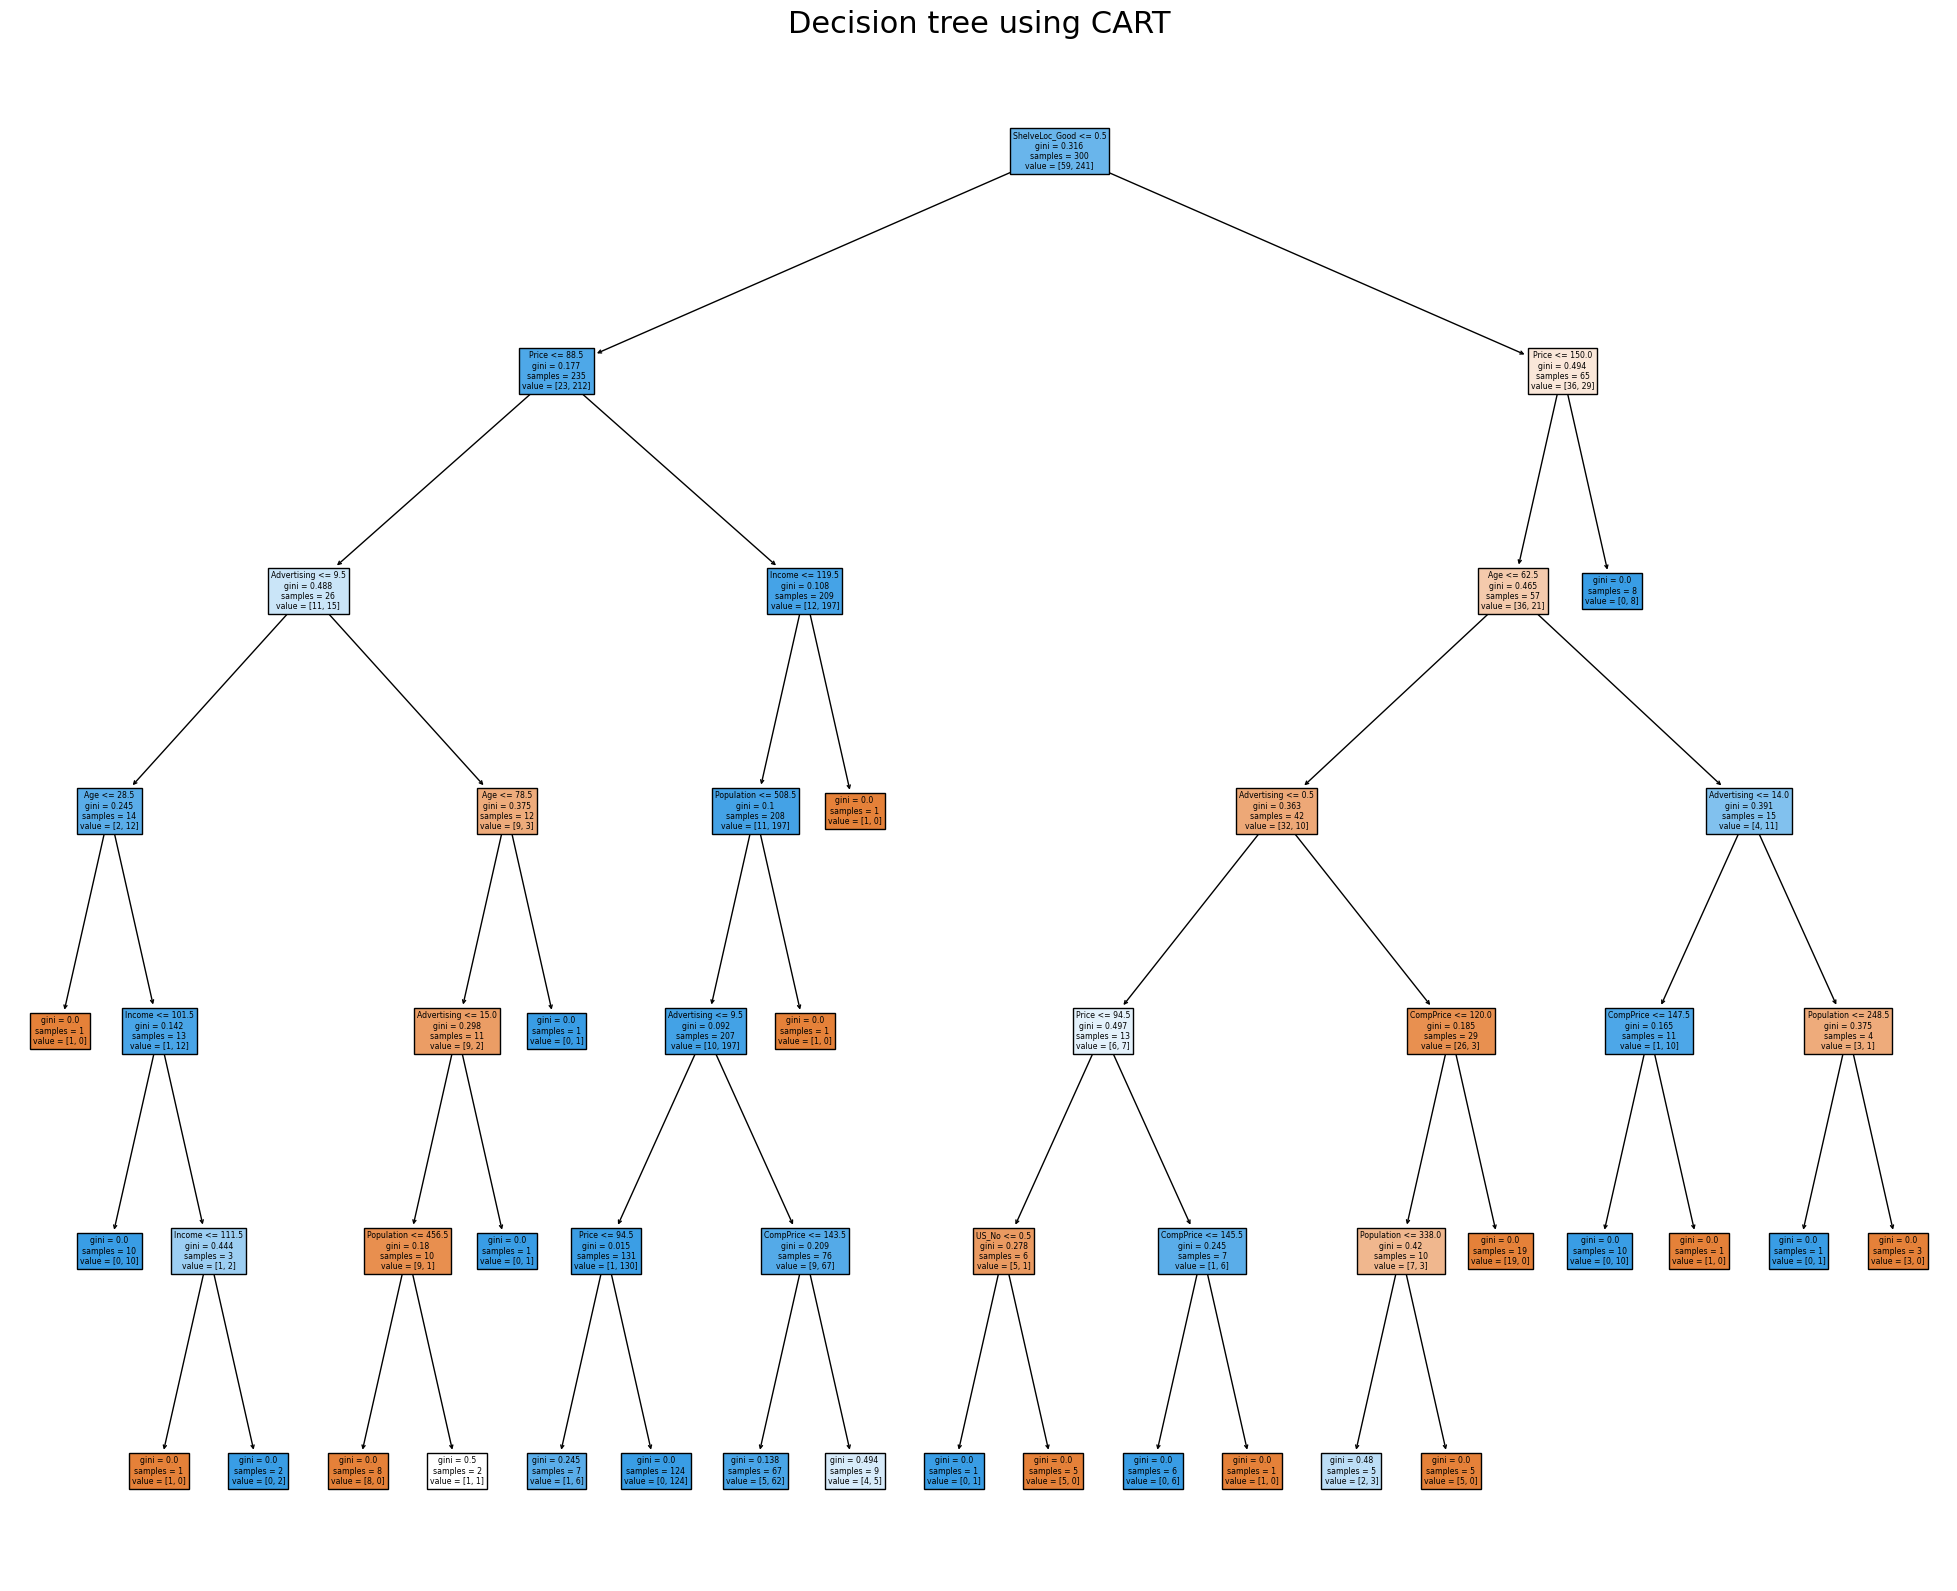

In [22]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price','Age','Education',
                     'ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No',
                     'US_Yes'], filled=True)
plt.title('Decision tree using CART',fontsize=22)
plt.savefig('DT_Cart.png')

#### After combining the insights from both the plots, we can say that following are the 3 top factors affecting the sales:
    1. Shelf Location at stores
    2. Pricing
    3. Advertising

Decision Tree Regression

In [23]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [24]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [28]:
X_train

array([[7.68, 126, 41],
       [6.88, 95, 44],
       [4.17, 123, 96],
       [4.21, 118, 35],
       [6.56, 117, 42],
       [6.5, 108, 69],
       [8.87, 131, 113],
       [16.27, 141, 60],
       [11.17, 107, 117],
       [3.63, 122, 74],
       [8.19, 127, 103],
       [10.27, 125, 103],
       [6.62, 132, 118],
       [4.42, 121, 90],
       [6.67, 116, 99],
       [4.69, 132, 113],
       [10.07, 130, 100],
       [7.58, 118, 32],
       [10.5, 122, 21],
       [9.5, 138, 73],
       [5.55, 104, 100],
       [12.11, 118, 117],
       [9.39, 117, 118],
       [7.5, 140, 29],
       [9.46, 89, 81],
       [6.59, 109, 73],
       [10.49, 122, 84],
       [7.78, 86, 54],
       [5.68, 130, 64],
       [5.04, 123, 114],
       [6.11, 133, 88],
       [8.77, 144, 63],
       [3.72, 139, 111],
       [10.43, 77, 69],
       [4.67, 111, 28],
       [5.16, 115, 60],
       [6.67, 156, 42],
       [7.36, 121, 24],
       [8.43, 138, 80],
       [4.53, 129, 42],
       [4.99, 122, 59],
    

In [29]:
X_test

array([[5.94, 100, 79],
       [9.34, 89, 78],
       [3.15, 117, 66],
       [11.54, 134, 44],
       [9.03, 104, 102],
       [7.81, 137, 102],
       [2.52, 124, 61],
       [6.64, 118, 70],
       [7.81, 104, 99],
       [6.97, 106, 46],
       [0.0, 139, 24],
       [7.8, 121, 50],
       [8.07, 116, 37],
       [2.66, 136, 65],
       [7.52, 123, 39],
       [8.69, 113, 64],
       [9.08, 152, 81],
       [10.81, 124, 113],
       [4.43, 134, 48],
       [3.45, 110, 45],
       [6.88, 119, 100],
       [4.68, 124, 46],
       [4.95, 121, 28],
       [4.83, 115, 115],
       [12.29, 147, 74],
       [4.53, 114, 113],
       [5.98, 124, 56],
       [5.94, 138, 83],
       [8.68, 131, 25],
       [8.19, 111, 105],
       [7.52, 116, 72],
       [4.15, 141, 64],
       [0.37, 147, 58],
       [6.67, 107, 119],
       [6.63, 115, 105],
       [8.01, 113, 100],
       [5.42, 103, 93],
       [5.3, 113, 22],
       [7.41, 162, 26],
       [12.3, 146, 62],
       [6.53, 123, 57],
       

In [30]:
y_train

array([22, 4, 10, 14, 7, 3, 0, 19, 11, 0, 0, 12, 12, 0, 5, 0, 11, 0, 16,
       11, 8, 18, 14, 0, 15, 0, 8, 0, 0, 0, 3, 11, 5, 0, 0, 0, 13, 0, 0,
       13, 0, 11, 0, 9, 12, 11, 0, 7, 0, 0, 14, 7, 10, 16, 0, 1, 8, 6, 0,
       16, 0, 2, 0, 15, 0, 0, 0, 0, 0, 3, 20, 9, 12, 0, 16, 5, 13, 12, 2,
       0, 15, 14, 0, 13, 7, 11, 16, 10, 8, 3, 14, 10, 0, 0, 18, 4, 10, 9,
       18, 0, 0, 0, 20, 0, 11, 0, 19, 26, 0, 12, 0, 0, 0, 13, 5, 15, 0,
       16, 11, 0, 7, 1, 0, 10, 0, 19, 0, 10, 0, 0, 0, 0, 8, 3, 16, 0, 5,
       9, 2, 0, 12, 0, 13, 9, 18, 5, 4, 17, 0, 15, 13, 14, 19, 5, 7, 10,
       0, 4, 0, 0, 9, 0, 10, 2, 0, 0, 1, 0, 11, 2, 12, 23, 0, 12, 6, 19,
       13, 4, 10, 3, 15, 5, 10, 6, 17, 1, 13, 13, 5, 13, 0, 7, 0, 7, 9,
       12, 0, 0, 17, 7, 0, 0, 13, 2, 4, 10, 22, 0, 7, 0, 0, 0, 6, 12, 5,
       13, 0, 6, 19, 11, 10, 11, 10, 4, 10, 0, 11, 0, 10, 0, 0, 0, 5, 11,
       5, 16, 3, 6, 0, 19, 15, 0, 9, 14, 0, 15, 20, 18, 0, 0, 3, 23, 14,
       14, 7, 8, 16, 7, 0, 15, 2, 0, 10, 8, 0, 3,

In [31]:
y_test

array([7, 0, 1, 4, 13, 13, 0, 0, 15, 11, 0, 0, 0, 4, 5, 10, 0, 13, 1, 9,
       5, 0, 19, 3, 13, 0, 11, 0, 10, 0, 0, 3, 7, 11, 0, 16, 15, 0, 12,
       10, 0, 0, 12, 0, 13, 0, 8, 0, 10, 2, 0, 0, 0, 0, 13, 11, 0, 0, 0,
       7, 0, 14, 11, 20, 1, 6, 0, 29, 0, 5, 12, 10, 17, 14, 4, 0, 0, 15,
       9, 0, 0, 0, 17, 11, 0, 0, 21, 5, 0, 3, 0, 0, 0, 0, 5, 1, 12, 25, 8,
       5, 4, 0, 3, 0, 3, 12, 10, 18, 0, 10, 8, 0, 24, 0, 0, 11, 10, 0, 0,
       17, 0, 0, 0, 0, 16, 4, 11, 2, 13, 0, 7, 0], dtype=object)

In [26]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
#Find the accuracy
model.score(X_test,y_test)

-1.2363764173721692